> We will see a robot moving on the screen

In [1]:
%cd -q ..

In [2]:
from robot.kuka_robot import KukaRobot
from robot.extend_kuka_robot import ExtendKukaRobot
from robot.snake_robot import SnakeRobot
from robot.ur5_robot import UR5Robot
from robot.multi_robot.dual_kuka_robot import DualKukaRobot



from robot.abstract_robot import DynamicRobotFactory
from objects.trajectory import WaypointLinearTrajectory

In [3]:
from time import sleep
def create_traj(robot, distance):  
    gifs = []
    p.resetSimulation()
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 0, lightPosition = [0, 0, 0.1])
    if isinstance(robot, SnakeRobot):
        plane = p.createCollisionShape(p.GEOM_PLANE)
        p.createMultiBody(0, plane)     
    p.resetDebugVisualizerCamera(
        cameraDistance=distance,
        cameraYaw=0,
        cameraPitch=-60,
        cameraTargetPosition=[0, -0.5, 1])    
    robot.load()
    for timestep in np.linspace(0, len(robot.trajectory.waypoints)-1, 100):
        robot.set_config_at_time(timestep)
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                                 renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]) 
    return gifs


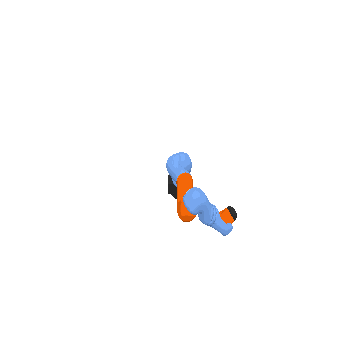


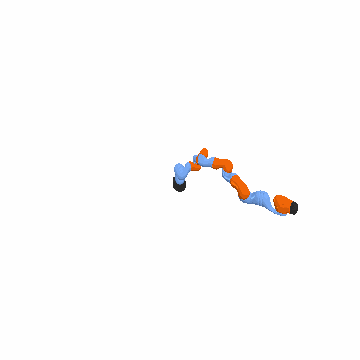


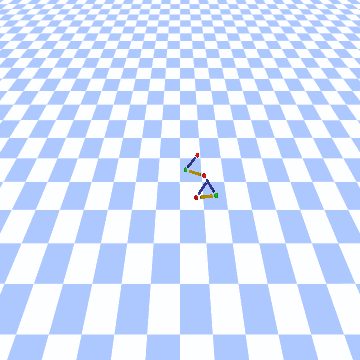


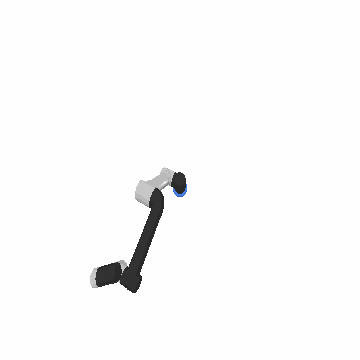


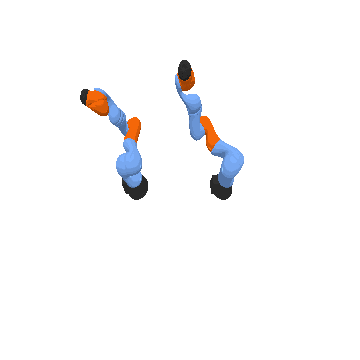

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64
p.connect(p.GUI, options='--background_color_red=1.0 --background_color_green=1.0 --background_color_blue=1.0')
for Robot, distance in zip([KukaRobot, ExtendKukaRobot, SnakeRobot, UR5Robot, DualKukaRobot], [0.5, 1.5, 5, 0.3, 0.5]):
    plt.clf()
    plt.close('all')
    robot = Robot()
    DynamicRobot = DynamicRobotFactory.create_dynamic_robot_class(Robot)
    p.resetSimulation()
    robot.load()
    # generate collision-free trajectory
    while True:
        traj = WaypointLinearTrajectory(np.random.uniform(low=robot.limits_low, high=robot.limits_high, size=(3, robot.config_dim)))    
        if robot._edge_fp(traj.waypoints[0], traj.waypoints[1]) and robot._edge_fp(traj.waypoints[1], traj.waypoints[2]):
            break
    dynamic_robot = DynamicRobot(trajectory=traj)
    gifs = create_traj(dynamic_robot, distance)
    save_gif(gifs, f'data/visualization/Dynamic{Robot.__name__}.gif')
    b64 = base64.b64encode(open(f'data/visualization/Dynamic{Robot.__name__}.gif', 'rb').read()).decode('ascii')
    display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))    
p.disconnect()    